<a href="https://colab.research.google.com/github/Sayandip2023/CBTCIP/blob/main/email_Spam_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJECT

We have data on text of 5573 emails, classified as spam or not spam(ham). We will train the model with this data and then observe its prediction on e-mail texts not seen by it before.

## Importing the necessary libraries
We will do all the imports required in this project.

In [ ]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

import re
import string

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import ipywidgets as widgets
from IPython.display import display

## Loading the dataset
We will load the dataset from the csv file we have into a dataframe.

In [ ]:
path="/content/Dataset.csv"
df = pd.read_csv(path)
df = df[['v1', 'v2']]
print(df.head())

     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


## Preprocessing the dataset
 We will define a function with e-mail text as input for preprocessing. Inside it, we will remove the charaters that are not words or whitespaces, convert the text into lowercase, split the text into tokens, generate translation table, remove punctuations, filter out non-alphabetic tokens and finally join the filtered list of tokens back into a single string, separated by whitespace.
 We will apply this function to the 'v2' column of DataFrame df and create a new column to store the preprocessed text.

In [ ]:
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    tokens = text.split()
    table = str.maketrans('', '', string.punctuation)
    tokens = [word.translate(table) for word in tokens]
    tokens = [word for word in tokens if word.isalpha()]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

df['preprocessed_text'] = df['v2'].apply(preprocess_text)

## Exploring the data distribution in the datset
We will find the count of Ham and Spam messages and represent them with the help of a count plot.

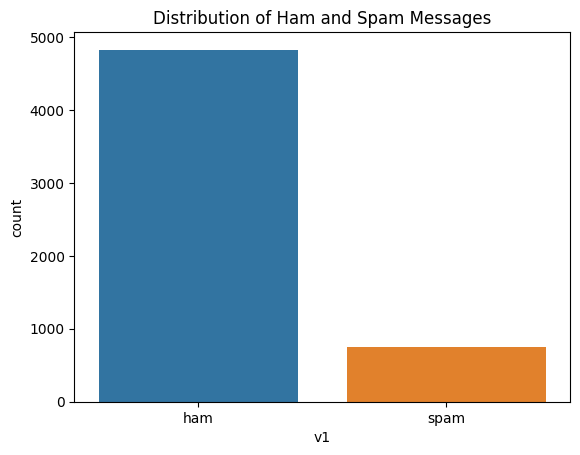

In [ ]:
sns.countplot(x='v1', data=df)
plt.title('Distribution of Ham and Spam Messages')
plt.show()

## Extracting the features from the Dataset
We will do feature extraction to convert the raw text data into numerical features for making predictions.

In [ ]:
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(df['preprocessed_text'])
y = df['v1']

## Splitting the dataset
We will split the dataset, keeping 80% of the dataset in the training set and rest in the test set.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Finding the best parameters
We will find the best fitting parameters for training our model.

In [ ]:
param_grid = {'C': [0.01, 0.1, 1, 10], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}


## Training the model
We can see that the best value of C is coming as 10 and the kernel is recommended to be linear. As the kernel would be linear, we need not think of gamma parameter here.

In [ ]:
svm_classifier = SVC(kernel='linear', C=10)
svm_classifier.fit(x_train, y_train)

SVC(C=10, kernel='linear')

## Evaluating the model
Now that our model is trained, we will evaluate our model for various metrics.

In [ ]:
y_pred = svm_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['ham', 'spam'])
print("SVM Model Evaluation:")
print("Accuracy :", accuracy)
print(report)

SVM Model Evaluation:
Accuracy : 0.9757847533632287
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       965
        spam       1.00      0.82      0.90       150

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.98      0.97      1115



## Cross Validation
We will evaluate the performance of the best Support Vector Machine during the grid search using 5-fold cross validation.

In [ ]:
best_svm_classifier = grid_search.best_estimator_
cv_scores = cross_val_score(best_svm_classifier, x, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", np.mean(cv_scores))

Cross-Validation Scores: [0.9793722  0.97399103 0.97666068 0.98025135 0.97935368]
Mean Cross-Validation Accuracy: 0.977925787571149


##Predicting with the model
We will now supply a unseen sample to our trained model and observe the model's prediction on e-mail text not seen before by the model.

In [ ]:
def predict(text):
    preprocessed_text = preprocess_text(text)
    tfidf_features = vectorizer.transform([preprocessed_text])
    prediction = svm_model.predict(tfidf_features)
    return prediction[0]

text_input = widgets.Text(placeholder='Enter your text here', description='Text:', layout=widgets.Layout(width='80%'))
button = widgets.Button(description='Detect')

def on_button_click(b):
    prediction = predict(text_input.value)
    print("The email is detected to be", prediction,".")

button.on_click(on_button_click)
display(text_input, button)


Text(value='', description='Text:', layout=Layout(width='80%'), placeholder='Enter your text here')

Button(description='Detect', style=ButtonStyle())

The email is detected to be spam .
